In [4]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

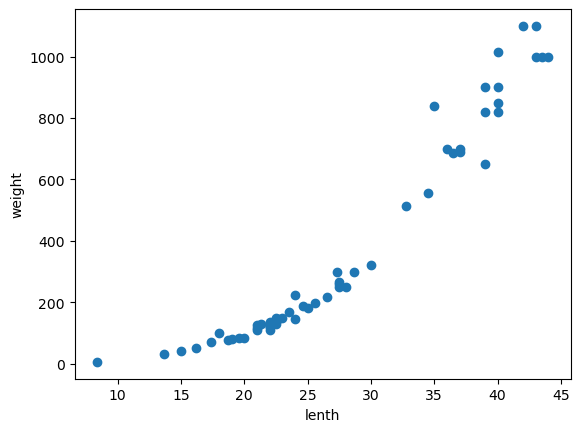

In [6]:
plt.scatter(perch_length, perch_weight)
plt.xlabel('lenth')
plt.ylabel('weight')
plt.show()

In [7]:
train_input, test_input, train_target, test_target = train_test_split(
    perch_length, perch_weight, random_state=27)

In [8]:
print(train_input.shape, test_input.shape)

(42,) (14,)


In [9]:
test_array = np.array([1,2,3,4])
print(test_array.shape)

(4,)


In [10]:
test_array = test_array.reshape(2,2)
print(test_array.shape)

(2, 2)


In [11]:
# 1차원 array 데이터를 2차원으로 변환 
train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)

In [12]:
print(train_input.shape, test_input.shape)

(42, 1) (14, 1)


In [13]:
# knn 회귀모델
# k값에 따라 가장 가까운 데이터의 평균을 구함.
from sklearn.neighbors import KNeighborsRegressor

In [14]:
# knn 회귀 모델 훈련
knr = KNeighborsRegressor()
knr.fit(train_input, train_target)

KNeighborsRegressor()

In [15]:
# 분류일때 score는 정확도.
# 회귀일때 score는 결정계수임.
knr.score(test_input, test_target)

0.9646286699121296

In [16]:
from sklearn.metrics import mean_absolute_error

In [17]:
# 테스트 세트에 대한 예측을 만듭니다.
test_prediction = knr.predict(test_input)

# 테스트 세트에 대한 평균 절댓값 오차를 계산합니다.
mae = mean_absolute_error(test_target, test_prediction)
print(mae) 

41.771428571428565


In [19]:
## train_score가 test_score보다 높은 상황이라 과소적합임.
print(knr.score(train_input, train_target))

0.9841917450106341


underfitting(과소적합):
- train_score, test_score 둘다 낮은상태
- train_score와 test_score의 정확도가 기대 이하임.
- 과소적합은 모델이 학습을 완료하지 못한상황.
- 과소적합이면 모델 복잡도를 증가시켜야함. 그러기 위해선 k값을 줄임.

overfitting(과적합) 
- train_score의 정확도가 엄청나게 높은데 test_score의 정확도가 낮은것 
- 과적합은 모델이 학습데이터에서만 과도하게 학습을 한것.
- 과적합이면 모델 복잡도를 감소시켜야함. 그러기 위해선 k값을 증가시켜야함.

In [20]:
# 과소적합 상황을 해소하려고 함.
# k값을 3으로 설정
knr.n_neighbors = 3
# 모델 재훈련
knr.fit(train_input, train_target)
print(knr.score(train_input, train_target))

0.984588542775928


In [21]:
print(knr.score(test_input, test_target))

0.9561825433190421


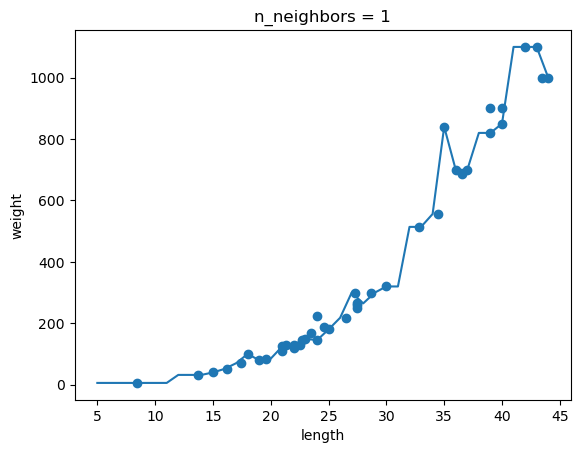

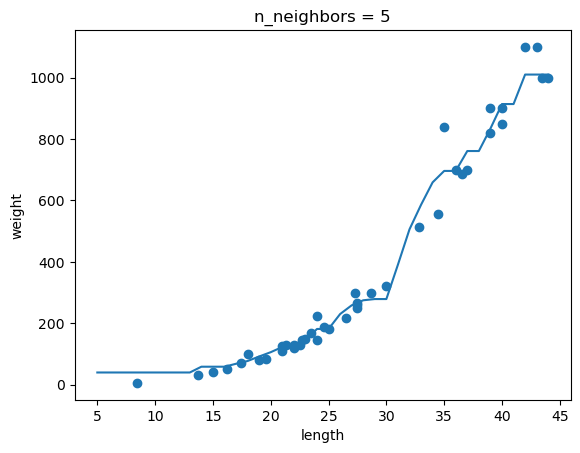

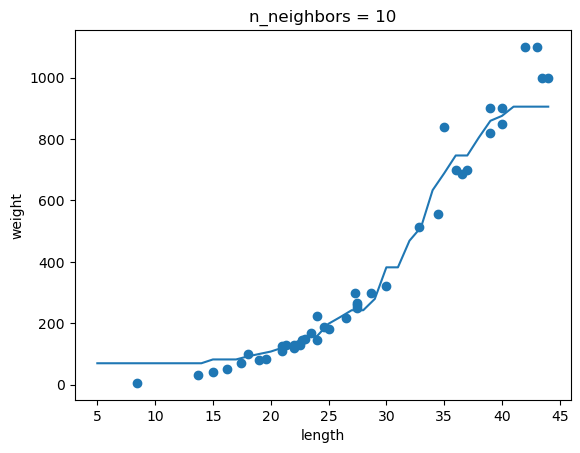

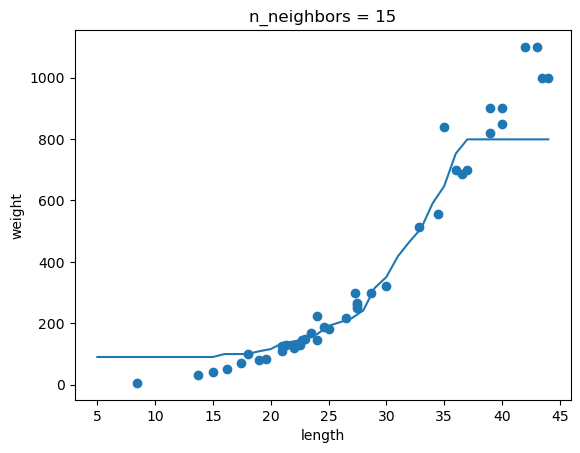

In [22]:
# k값의 따라 객체 만들기
knr = KNeighborsRegressor()
x= np.arange(5,45). reshape(-1,1)

# n= 1,5,10, 15일때 예측 결과
for n in [1,5,10,15]:
    #모델훈련
    knr.n_neighbors = n
    knr.fit(train_input, train_target)
    # 지정한 범위 x에 대한 예측 구하기
    prediction = knr.predict(x)
    # 훈련 세트와 예측 결과 그래프 그리기
    plt.scatter(train_input, train_target)
    plt.plot(x, prediction)
    plt.title('n_neighbors = {}'.format(n))
    plt.xlabel('length')
    plt.ylabel('weight')
    plt.show()